In [1]:
# https://www.kaggle.com/competitions/playground-series-s3e23/overview

from utils import Util
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
sample = pd.read_csv("./data/sample_submission.csv",header=None)

c:\Users\nakamura\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
train.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False


In [4]:
test.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,101763,33.0,5.0,1.0,4.0,144.0,824.82,0.04,26.96,30.05,...,1257.60,30,0,3,0,21.0,23.0,87.0,57.0,9.0
1,101764,27.0,8.0,8.0,2.0,125.0,646.24,0.04,22.82,27.22,...,804.58,23,0,2,0,18.0,19.0,70.0,49.0,15.0
2,101765,130.0,11.0,7.0,10.0,545.0,3831.40,0.02,48.15,66.17,...,6453.34,99,9,17,1,26.0,53.0,333.0,244.0,21.0
3,101766,65.0,7.0,1.0,7.0,156.0,855.71,0.06,17.23,49.89,...,896.42,45,8,10,0,15.0,26.0,88.0,60.0,13.0
4,101767,22.0,3.0,1.0,3.0,52.0,238.42,0.10,9.60,26.70,...,145.80,16,0,4,0,12.0,15.0,30.0,24.0,5.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 101763 non-null  int64  
 1   loc                101763 non-null  float64
 2   v(g)               101763 non-null  float64
 3   ev(g)              101763 non-null  float64
 4   iv(g)              101763 non-null  float64
 5   n                  101763 non-null  float64
 6   v                  101763 non-null  float64
 7   l                  101763 non-null  float64
 8   d                  101763 non-null  float64
 9   i                  101763 non-null  float64
 10  e                  101763 non-null  float64
 11  b                  101763 non-null  float64
 12  t                  101763 non-null  float64
 13  lOCode             101763 non-null  int64  
 14  lOComment          101763 non-null  int64  
 15  lOBlank            101763 non-null  int64  
 16  lo

In [7]:
print(train.describe())

                  id            loc           v(g)          ev(g)  \
count  101763.000000  101763.000000  101763.000000  101763.000000   
mean    50881.000000      37.347160       5.492684       2.845022   
std     29376.592059      54.600401       7.900855       4.631262   
min         0.000000       1.000000       1.000000       1.000000   
25%     25440.500000      13.000000       2.000000       1.000000   
50%     50881.000000      22.000000       3.000000       1.000000   
75%     76321.500000      42.000000       6.000000       3.000000   
max    101762.000000    3442.000000     404.000000     165.000000   

               iv(g)              n              v              l  \
count  101763.000000  101763.000000  101763.000000  101763.000000   
mean        3.498826      96.655995     538.280956       0.111634   
std         5.534541     171.147191    1270.791601       0.100096   
min         1.000000       0.000000       0.000000       0.000000   
25%         1.000000      25.0000

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67842 entries, 0 to 67841
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 67842 non-null  int64  
 1   loc                67842 non-null  float64
 2   v(g)               67842 non-null  float64
 3   ev(g)              67842 non-null  float64
 4   iv(g)              67842 non-null  float64
 5   n                  67842 non-null  float64
 6   v                  67842 non-null  float64
 7   l                  67842 non-null  float64
 8   d                  67842 non-null  float64
 9   i                  67842 non-null  float64
 10  e                  67842 non-null  float64
 11  b                  67842 non-null  float64
 12  t                  67842 non-null  float64
 13  lOCode             67842 non-null  int64  
 14  lOComment          67842 non-null  int64  
 15  lOBlank            67842 non-null  int64  
 16  locCodeAndComment  678

In [2]:
print(train['defects'].value_counts())
print(train["defects"].unique())

False    78699
True     23064
Name: defects, dtype: int64
[False  True]


In [11]:
train["defects_e"] = Util.label_encoding(train["defects"])
print(train)

            id    loc  v(g)  ev(g)  iv(g)      n        v     l      d      i  \
0            0   22.0   3.0    1.0    2.0   60.0   278.63  0.06  19.56  14.25   
1            1   14.0   2.0    1.0    2.0   32.0   151.27  0.14   7.00  21.11   
2            2   11.0   2.0    1.0    2.0   45.0   197.65  0.11   8.05  22.76   
3            3    8.0   1.0    1.0    1.0   23.0    94.01  0.19   5.25  17.86   
4            4   11.0   2.0    1.0    2.0   17.0    60.94  0.18   5.63  12.44   
...        ...    ...   ...    ...    ...    ...      ...   ...    ...    ...   
101758  101758   10.0   2.0    1.0    1.0   28.0   122.98  0.15   6.60  18.63   
101759  101759   27.0   5.0    4.0    1.0  107.0   559.93  0.06  18.00  34.17   
101760  101760   26.0   1.0    1.0    1.0   83.0   360.17  0.04  22.75  12.56   
101761  101761   10.0   2.0    1.0    2.0   43.0   191.76  0.15   6.46  29.53   
101762  101762  136.0  18.0   18.0    1.0  296.0  1704.57  0.02  44.82  44.08   

        ...  lOComment  lOB

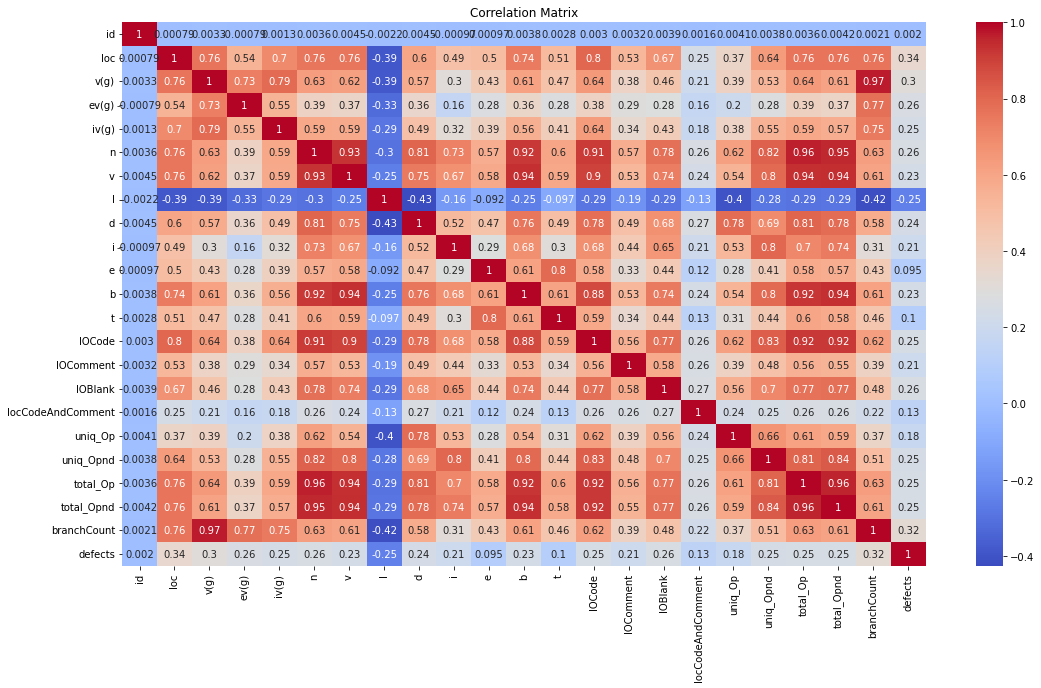

In [3]:
# 数値列の相関行列を計算
correlation_matrix = train.corr()
# 相関行列のヒートマップを可視化
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

l                   -0.253237
id                   0.001976
e                    0.095366
t                    0.099592
locCodeAndComment    0.133150
uniq_Op              0.178474
lOComment            0.205402
i                    0.208577
v                    0.231179
b                    0.232594
d                    0.241936
iv(g)                0.245618
uniq_Opnd            0.246113
total_Op             0.250533
lOCode               0.250604
total_Opnd           0.252752
lOBlank              0.257819
n                    0.258080
ev(g)                0.259928
v(g)                 0.301187
branchCount          0.322827
loc                  0.342642
Name: defects, dtype: float64


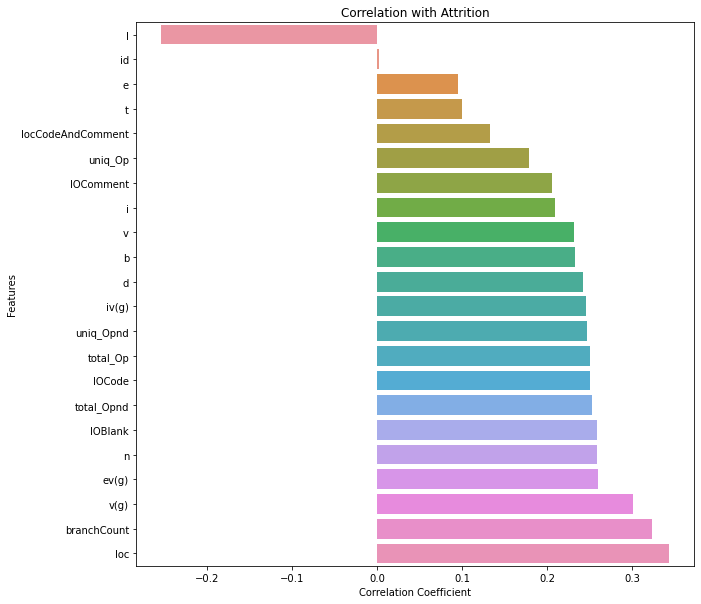

In [5]:
correlation_with_price_range = train.corr()['defects'].drop('defects')
correlation_with_price_range = correlation_with_price_range.sort_values()
print(correlation_with_price_range)

#横棒グラフで相関係数を表示 
#y_corrには特定の列の相関係数を格納 
fig, ax = plt.subplots(figsize=(10, 10)) 
#横棒グラフ作成 
sns.barplot(x=correlation_with_price_range, y=correlation_with_price_range.index, ax=ax) 
#X,Y軸とグラフタイトル 
ax.set_xlabel("Correlation Coefficient") 
ax.set_ylabel("Features") 
ax.set_title(f"Correlation with Attrition") 
#表示 
plt.show()

In [9]:
correlation_with_price_range = train.corr()['defects'].drop('defects')
correlation_with_price_range = correlation_with_price_range.sort_values()

# 絶対値が閾値以上の相関係数を持つ特徴量を抽出
selected_features = correlation_with_price_range[abs(correlation_with_price_range) >= 0.25]
print(selected_features)

l             -0.253237
total_Op       0.250533
lOCode         0.250604
total_Opnd     0.252752
lOBlank        0.257819
n              0.258080
ev(g)          0.259928
v(g)           0.301187
branchCount    0.322827
loc            0.342642
Name: defects, dtype: float64
